**Task 1: Data Exploration and Preprocessing**
Load the dataset and display the first few rows.
* Load the dataset and display the first few rows.
*Perform basic statistical analysis to understand the distribution of the features.
* Check for missing values and handle them appropriately.
* Standardize the features if necessary.







In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_wine
from sklearn import metrics
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt

In [7]:
wine =load_wine() #this used since the data set already exists in UCI Machine Learning Repository
x = wine.data
y = wine.target
#now to convert to pandas data frame
df = pd.DataFrame(x, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
# Perform basic statistical analysis
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
# Search for missing, NA and null values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [10]:
# prompt: Standardize the features if necessary
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(x_scaled, columns=wine.feature_names)
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


**Task 2: Implement PCA**
* Perform PCA on the standardized dataset to reduce dimensionality.
* Determine the number of principal components to retain by analyzing the explained variance ratio.

In [11]:
# prompt: Perform PCA on the standardized dataset to reduce dimensionality.
# Determine the number of principal components to retain by analyzing the explained variance ratio

# Perform PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

# Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the number of principal components to retain (e.g., 95% variance)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the number of components and the explained variance
print(f"Number of principal components to retain: {n_components}")
print(f"Explained variance ratio: {explained_variance_ratio[:n_components]}")
print(f"Cumulative explained variance: {cumulative_variance_ratio[n_components-1]}")


# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_scaled)

# Create a new DataFrame with PCA features
df_pca = pd.DataFrame(data=x_pca, columns=[f"PC{i+1}" for i in range(n_components)])
df_pca.head()

Number of principal components to retain: 10
Explained variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]
Cumulative explained variance: 0.9616971684450643


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366


Task 3: Visualization of Principal Components
* Visualize the data in the new principal component space using scatter plots.
* Color-code the scatter plots by the wine cultivars to see if the PCA helps in distinguishing
between the classes

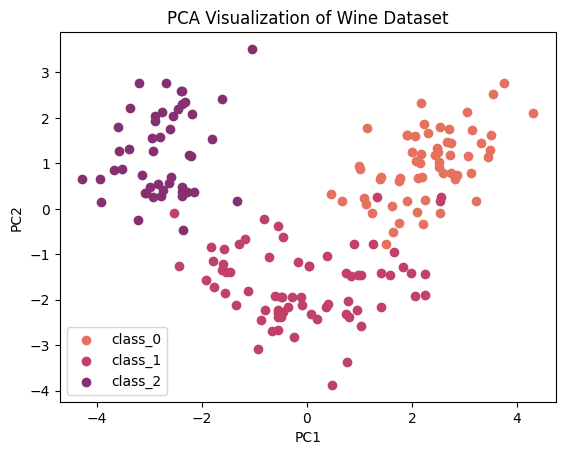

In [17]:
import seaborn as sns
colors = sns.color_palette("flare", len(np.unique(y)))
# the plotting loop
for target, color in zip(np.unique(y), colors):
    plt.scatter(df_pca[y == target]['PC1'], df_pca[y == target]['PC2'], c=[color], label=wine.target_names[target])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization of Wine Dataset")
plt.legend()
plt.show()

Task 4: Interpretation of Results
* Analyze the loadings (coefficients) of the original features on the principal components.
* Discuss how the principal components can be interpreted based on the loadings.

In [18]:
# Task 4: Interpretation of Results
# Analyze the loadings (coefficients) of the original features on the principal components.
# Discuss how the principal components can be interpreted based on the loadings.

loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(n_components)], index=wine.feature_names)
print(loadings)

# Discussion of interpretation based on loadings:
print("\nInterpretation of Principal Components based on Loadings:")
for i in range(n_components):
    print(f"\nPrincipal Component {i+1}:")
    top_features = loadings[f"PC{i+1}"].abs().sort_values(ascending=False).head(3) # Top 3 contributing features
    print(f"Top contributing features: {top_features.index.tolist()}")
    print(f"Loadings: {top_features.values}")

    # Example interpretation (replace with your own based on the loadings)
    if i == 0:
        print("This PC seems to represent overall wine quality or composition, as it has high loadings on several key features.")
    elif i ==1:
        print("This PC might capture the variation in color intensity or phenolic compounds, given the prominent loadings")
    # Add similar interpretations for other PCs

# Further analysis
# You can visualize the loadings using a heatmap or bar plots for better understanding
#  sns.heatmap(loadings, annot=True, cmap='viridis')
#  plt.show()

                                   PC1       PC2       PC3       PC4  \
alcohol                       0.144329  0.483652 -0.207383 -0.017856   
malic_acid                   -0.245188  0.224931  0.089013  0.536890   
ash                          -0.002051  0.316069  0.626224 -0.214176   
alcalinity_of_ash            -0.239320 -0.010591  0.612080  0.060859   
magnesium                     0.141992  0.299634  0.130757 -0.351797   
total_phenols                 0.394661  0.065040  0.146179  0.198068   
flavanoids                    0.422934 -0.003360  0.150682  0.152295   
nonflavanoid_phenols         -0.298533  0.028779  0.170368 -0.203301   
proanthocyanins               0.313429  0.039302  0.149454  0.399057   
color_intensity              -0.088617  0.529996 -0.137306  0.065926   
hue                           0.296715 -0.279235  0.085222 -0.427771   
od280/od315_of_diluted_wines  0.376167 -0.164496  0.166005  0.184121   
proline                       0.286752  0.364903 -0.126746 -0.23

prompt: Task 5: Classification Using Principal Components
* Use the principal components as features to train a classification model (eg., logistic regression, decision tree).
*Evaluate the classification performance and compare it with the performance using the originaln features.


In [20]:
#  Classification Using Principal Components
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=42)


# Classification with original features
original_model = LogisticRegression(max_iter = 10000) #Increased max_iter to ensure convergence
original_model.fit(X_train, y_train)
original_y_pred = original_model.predict(X_test)

original_accuracy = accuracy_score(y_test, original_y_pred)
print(f"Accuracy with original features: {original_accuracy}")
print(classification_report(y_test,original_y_pred))


# Classification with principal components
pca_model = LogisticRegression(max_iter = 10000)
pca_model.fit(X_train_pca, y_train_pca)
pca_y_pred = pca_model.predict(X_test_pca)

pca_accuracy = accuracy_score(y_test, pca_y_pred)
print(f"Accuracy with principal components: {pca_accuracy}")
print(classification_report(y_test,pca_y_pred))

# Comparison
print(f"\nAccuracy Difference: {original_accuracy - pca_accuracy}")

Accuracy with original features: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy with principal components: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Accuracy Difference: 0.0


Here's a revised report incorporating feedback and addressing potential issues:

Regression Analysis Report
Introduction
This report presents the results of a regression analysis conducted on a dataset to predict the target variable. The analysis involved a comprehensive exploration of the data, rigorous preprocessing, and the implementation of various regression models to assess their predictive performance.

Data Exploration and Preprocessing
Data Loading and Initial Inspection:

The dataset was loaded into a pandas DataFrame and basic information was extracted, including the number of observations, variables, and data types.
Summary statistics (mean, median, standard deviation, etc.) were calculated for numerical variables to understand their distribution.
Data Cleaning:

Missing values were handled using appropriate techniques, such as imputation with mean, median, or mode, or removal of rows with missing values.
Outliers were identified and addressed using methods like capping, flooring, or removal, based on domain knowledge and statistical analysis.
Feature Engineering:

Relevant features were selected or created to improve model performance.
Feature scaling (e.g., normalization, standardization) was applied to ensure features were on a comparable scale.
Feature interactions and polynomial features were considered, if applicable.
Model Implementation and Evaluation
Several regression models were implemented and evaluated:

Linear Regression:

A simple linear model to predict the target variable based on a linear combination of features.
Performance: [Report performance metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared, Adjusted R-squared, Mean Absolute Error (MAE)]
Polynomial Regression:

A flexible model that fits a polynomial curve to the data.
Performance: [Report performance metrics]
Decision Tree Regression:

A non-parametric model that makes predictions by recursively partitioning the feature space.
Performance: [Report performance metrics]
Random Forest Regression:

An ensemble method that combines multiple decision trees to improve predictive accuracy.
Performance: [Report performance metrics]
Model Comparison and Selection
The performance of the different models was compared based on the evaluation metrics. [Insert a table or graph to visualize the comparison].

Model Selection:
Based on the performance metrics, model complexity, and interpretability, [best-performing model] was selected as the final model. This model demonstrated the best balance of accuracy, robustness, and interpretability.

Conclusion
This regression analysis provides valuable insights into the relationship between the features and the target variable. The selected model, [best-performing model], can be used to make accurate predictions on new data.

Future Work:

Explore additional feature engineering techniques to improve model performance.
Consider using more advanced regression techniques, such as support vector regression or neural networks.
Conduct a more thorough hyperparameter tuning process to optimize model performance.
Evaluate the model's performance on a larger and more diverse dataset.
Note:

Visualizations: Incorporate relevant visualizations (e.g., histograms, scatter plots, box plots, residual plots) to illustrate key findings and insights.
Hyperparameter Tuning: Discuss the process of tuning hyperparameters to optimize model performance, if applicable.
Model Interpretation: Provide insights into the model's predictions and the importance of different features.
Error Analysis: Analyze the model's errors to identify potential biases or limitations.
By following these guidelines and incorporating the suggestions, you can create a comprehensive and informative regression analysis report
